<a href="https://colab.research.google.com/github/selvadharani-it19/Traffic-sign-classification/blob/main/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 2s (167 kB/s)
Selecting previously unselected package rar.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
!unzip "/content/gtsrb-german-traffic-sign.zip"

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils.vis_utils import plot_model

In [ ]:
os.chdir('/content')

In [ ]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [ ]:
cur_path
!mkdir training

In [ ]:
np.save('./training/data',data)
np.save('./training/target',labels)
cur_path

'/content'

In [ ]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [ ]:
print(data.shape, labels.shape)

(0,) (0,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(labels)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[ 0  0  0 ... 42 42 42]
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='tanh',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='tanh'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(rate=0.5))
# We have 43 classes 
model.add(Dense(43, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_test,y_test))


Epoch 1/20
981/981 [==============================] - 5s 5ms/step - loss: 1.0627 - accuracy: 0.7232 - val_loss: 0.1966 - val_accuracy: 0.9529
Epoch 2/20
981/981 [==============================] - 4s 5ms/step - loss: 0.2253 - accuracy: 0.9412 - val_loss: 0.0839 - val_accuracy: 0.9805
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1213 - accuracy: 0.9692 - val_loss: 0.0500 - val_accuracy: 0.9878
Epoch 4/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0814 - accuracy: 0.9799 - val_loss: 0.0351 - val_accuracy: 0.9904
Epoch 5/20
981/981 [==============================] - 5s 5ms/step - loss: 0.0649 - accuracy: 0.9839 - val_loss: 0.0337 - val_accuracy: 0.9912
Epoch 6/20
981/981 [==============================] - 5s 5ms/step - loss: 0.0539 - accuracy: 0.9864 - val_loss: 0.0270 - val_accuracy: 0.9936
Epoch 7/20
981/981 [==============================] - 5s 5ms/step - loss: 0.0469 - accuracy: 0.9877 - val_loss: 0.0257 - val_accuracy: 0.9936
Epoch 

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('Test.csv')

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.977513855898654


In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,validation_data=(X_test,y_test))


Epoch 1/20
981/981 [==============================] - 5s 5ms/step - loss: 2.8586 - accuracy: 0.2633 - val_loss: 1.9863 - val_accuracy: 0.5077
Epoch 2/20
981/981 [==============================] - 4s 5ms/step - loss: 1.8836 - accuracy: 0.5002 - val_loss: 1.3715 - val_accuracy: 0.6607
Epoch 3/20
981/981 [==============================] - 5s 5ms/step - loss: 1.4372 - accuracy: 0.6124 - val_loss: 1.0391 - val_accuracy: 0.7424
Epoch 4/20
981/981 [==============================] - 4s 5ms/step - loss: 1.1649 - accuracy: 0.6868 - val_loss: 0.8266 - val_accuracy: 0.8043
Epoch 5/20
981/981 [==============================] - 4s 5ms/step - loss: 0.9739 - accuracy: 0.7448 - val_loss: 0.6931 - val_accuracy: 0.8396
Epoch 6/20
981/981 [==============================] - 5s 5ms/step - loss: 0.8457 - accuracy: 0.7816 - val_loss: 0.5879 - val_accuracy: 0.8625
Epoch 7/20
981/981 [==============================] - 5s 5ms/step - loss: 0.7495 - accuracy: 0.8056 - val_loss: 0.5123 - val_accuracy: 0.8791
Epoch 

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label
    

In [ ]:
Y_pred = model.predict_classes(X_test)
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


Predicted traffic sign is:  Keep right


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


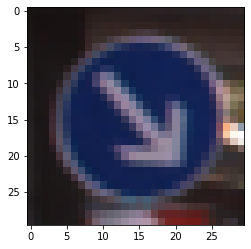

In [ ]:
def _make_predict_function():
 
 plot,prediction = test_on_img('/content/Test/00005.png')
 s = [str(i) for i in prediction] 
 a = int("".join(s)) 
 print("Predicted traffic sign is: ", classes[a])
 plt.imshow(plot)
 plt.show()
_make_predict_function()